In [63]:
import os
import sys
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Load and prepare the data
data_path = "./data/yfinance_data/AAPL_historical_data.csv"
df = pd.read_csv(data_path, parse_dates=['Date'])

df.set_index('Date', inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [65]:
# check for missing values
print(df.isnull().sum())
df.head()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [66]:
from src.outlier import iqr_outliers, z_score_outliers

In [67]:
from src.outlier import iqr_outliers, z_score_outliers

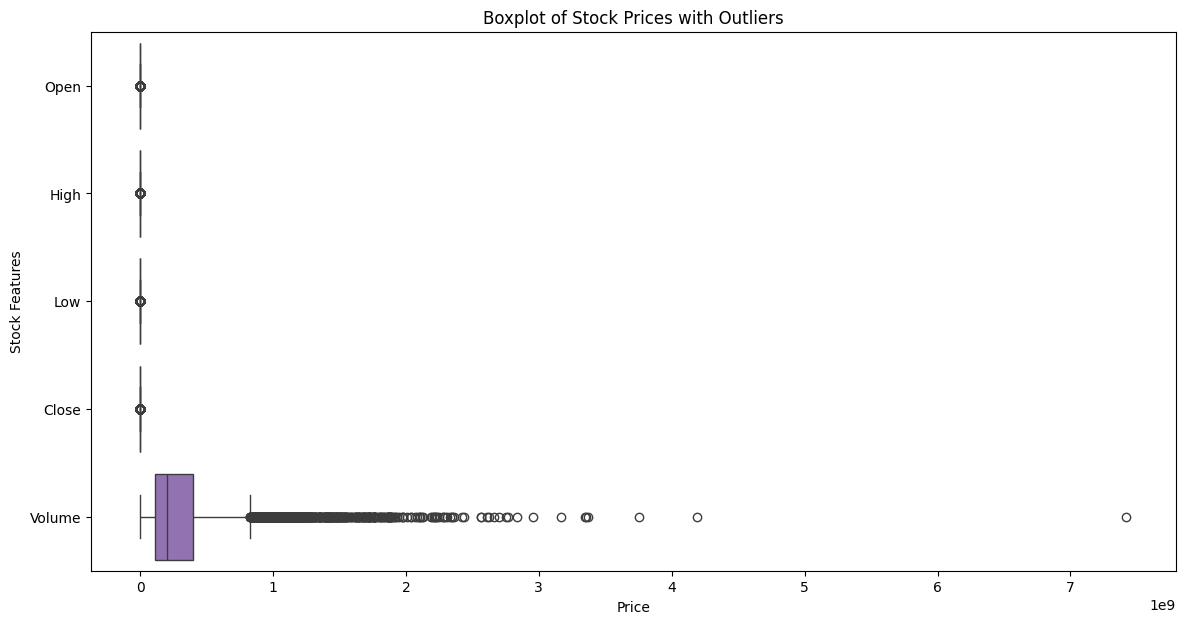

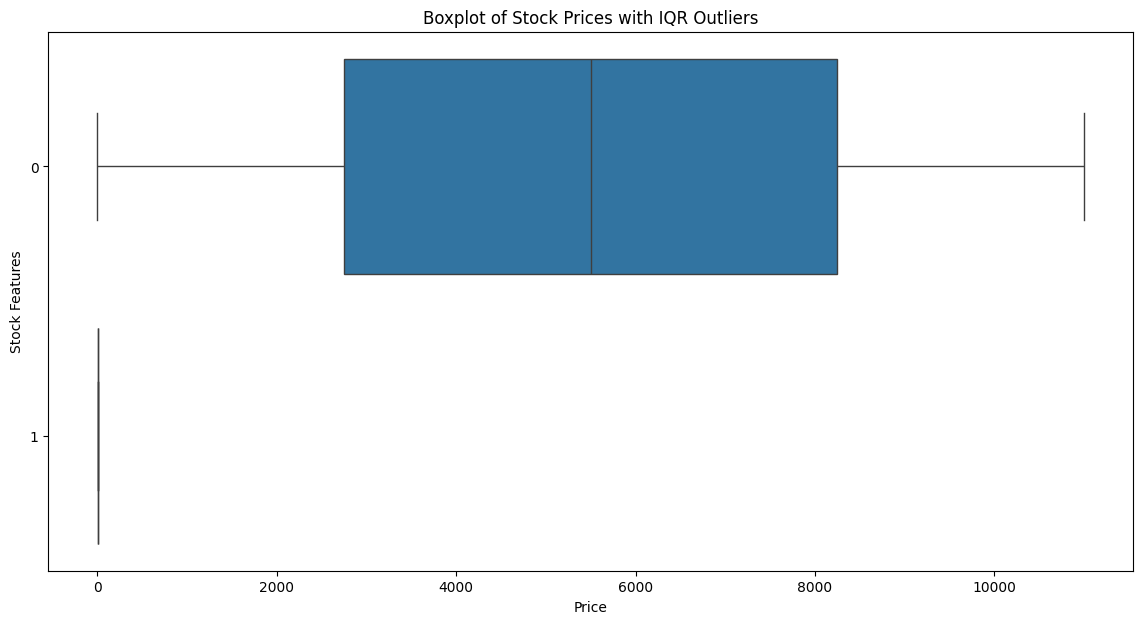

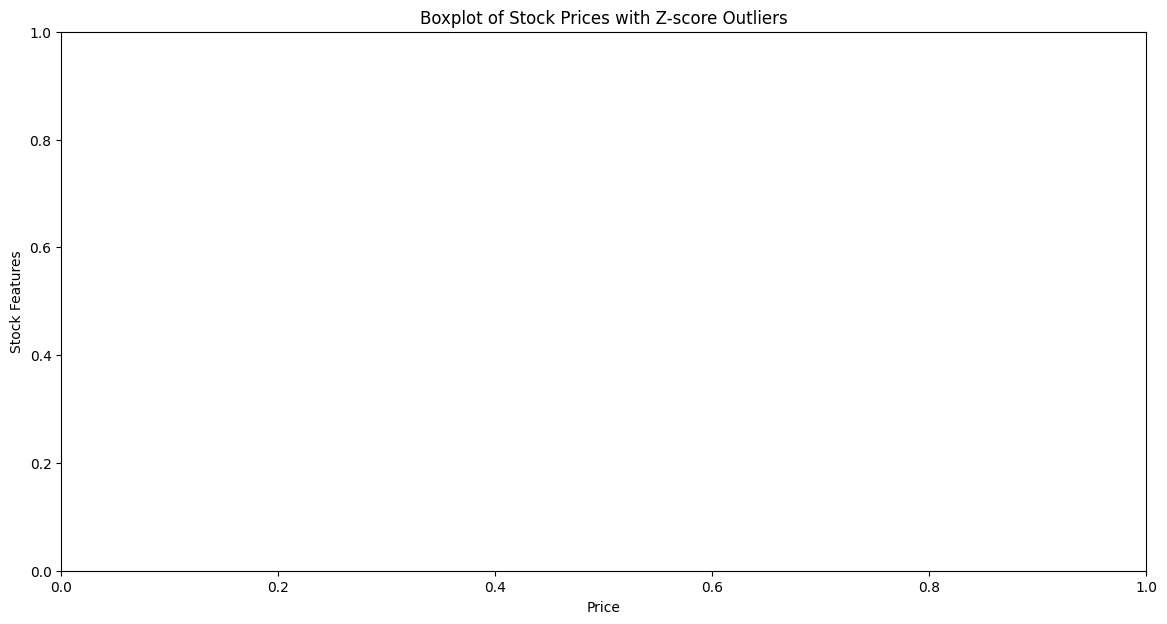

Processed data saved to ./data/yfinance_data/processed/AAPL_processed_data.csv


In [68]:
iqr_outliers_df = iqr_outliers(df)
# z_score_outliers_df = z_score_outliers(df)
# Plotting the outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Stock Prices with Outliers')
plt.xlabel('Price')
plt.ylabel('Stock Features')
plt.savefig('boxplot_outliers.png')


# Plotting the IQR outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=iqr_outliers_df, orient='h')
plt.title('Boxplot of Stock Prices with IQR Outliers')
plt.xlabel('Price')
plt.ylabel('Stock Features')
plt.savefig('boxplot_iqr_outliers.png')


# Plotting the Z-score outliers
plt.figure(figsize=(14, 7))
# sns.boxplot(data=z_score_outliers_df, orient='h')
plt.title('Boxplot of Stock Prices with Z-score Outliers')
plt.xlabel('Price')
plt.ylabel('Stock Features')
plt.savefig('boxplot_z_score_outliers.png')
# Display the plots
plt.show()


# Save the processed data
output_path = "./data/yfinance_data/processed/AAPL_processed_data.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=True)
print(f"Processed data saved to {output_path}")
# Save the outliers data

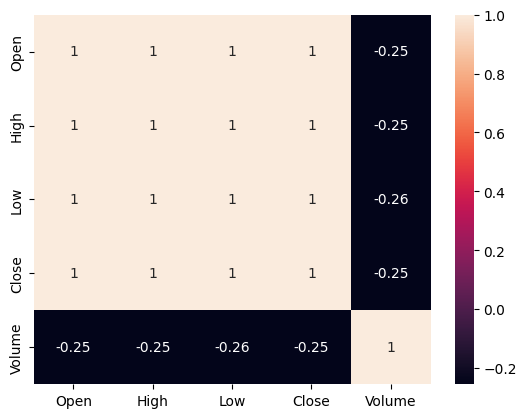

In [69]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [70]:
for col in df:
    print(f"Outlier values of {col} : {list(iqr_outliers_df)} ")


columns = ["Open", "High", "Low", "Close"]

Outlier values of Open : [array([    0,     1,     2, ..., 10995, 10996, 10997], shape=(10997,)), array([4, 4, 4, ..., 4, 4, 4], shape=(10997,))] 
Outlier values of High : [array([    0,     1,     2, ..., 10995, 10996, 10997], shape=(10997,)), array([4, 4, 4, ..., 4, 4, 4], shape=(10997,))] 
Outlier values of Low : [array([    0,     1,     2, ..., 10995, 10996, 10997], shape=(10997,)), array([4, 4, 4, ..., 4, 4, 4], shape=(10997,))] 
Outlier values of Close : [array([    0,     1,     2, ..., 10995, 10996, 10997], shape=(10997,)), array([4, 4, 4, ..., 4, 4, 4], shape=(10997,))] 
Outlier values of Volume : [array([    0,     1,     2, ..., 10995, 10996, 10997], shape=(10997,)), array([4, 4, 4, ..., 4, 4, 4], shape=(10997,))] 


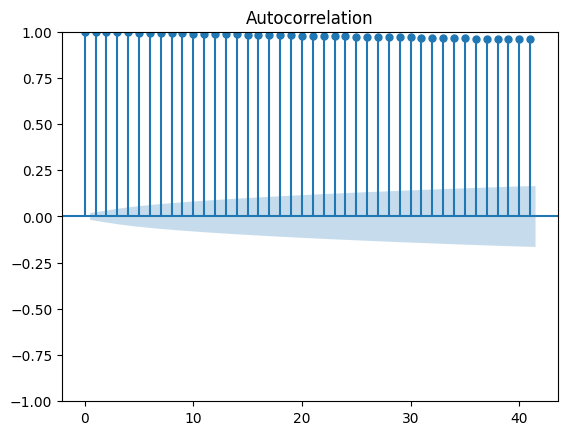

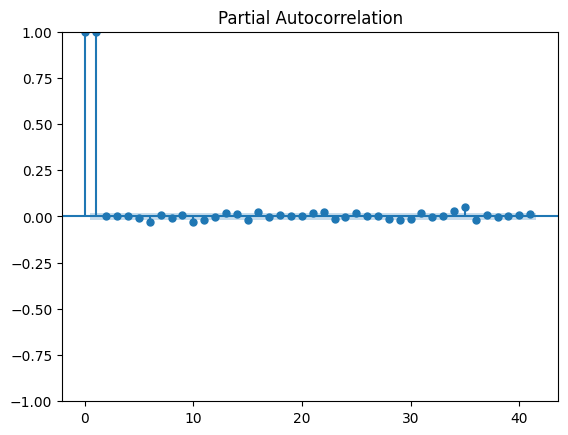

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df.Close)
plot_pacf(df.Close)
plt.show()

In [72]:

# Apply TA-Lib technical indicators
from src.technical_indicators import TechnicalIndicators

In [73]:
technical_indicators = TechnicalIndicators(df)

# SMA[20]
sma_20 = technical_indicators.moving_average(20)
# SMA[50]
sma_50 = technical_indicators.moving_average(50)
# RSI[14]
rsi_14 = technical_indicators.relative_strength_index(14)
# MACD
macd = technical_indicators.moving_average_convergence_divergence()

In [77]:
from src.visualizers import Visualizer

In [ ]:
# Instantiate the Visualizer
viz = Visualizer(df)

viz.plot_stock_with_indicators(
    sma_columns=[sma_20],
    macd_columns=macd,
    rsi_column=rsi_14,
    volume=True,
    title='Stock Price with SMA, MACD, RSI and Volume'
)

['data', 'plot_boxplot', 'plot_correlation_matrix', 'plot_distribution', 'plot_heatmap', 'plot_pairwise', 'plot_time_series']


In [ ]:
# Cell 4: Use PyNance for financial metrics (example: daily returns)
# df['Daily_Return'] = stocks.returns(df['Close'])

KeyError: 'SMA_20'

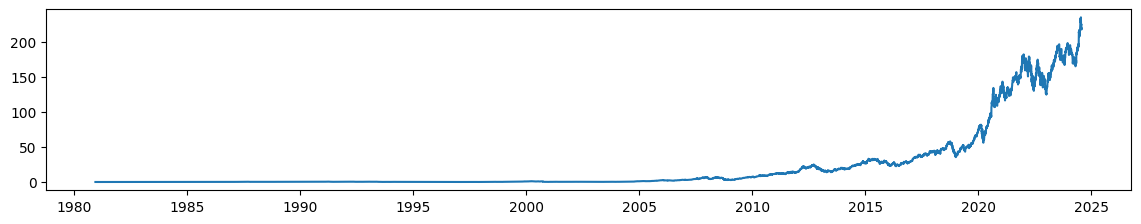

In [ ]:
# Cell 5: Visualize the data and indicators
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='20-day SMA')
plt.title('AAPL Close Price & 20-day SMA')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['RSI_14'], label='RSI (14)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('AAPL RSI (14)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_Signal'], label='MACD Signal')
plt.title('AAPL MACD')
plt.legend()

plt.tight_layout()
plt.show()